In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import pandas_datareader.data as web
import yfinance as yf

In [52]:
import yfinance as yf

# Set your date range
start = '2012-01-01'
end = '2022-12-31'

# Download data directly using yfinance
df = yf.download('AAPL', start=start, end=end)

if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

# Show the first 5 rows
print(df.head())


C:\Users\Asus\AppData\Local\Temp\ipykernel_20236\3023273793.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start=start, end=end)
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Date                                                             
2012-01-03  12.359181  12.397351  12.292161  12.304183  302220800
2012-01-04  12.425601  12.462869  12.300576  12.322215  260022000
2012-01-05  12.563548  12.579176  12.402457  12.470982  271269600
2012-01-06  12.694887  12.705406  12.599315  12.615845  318292800
2012-01-09  12.674752  12.855679  12.663331  12.788057  394024400


In [53]:
df.tail()

Price,Close,High,Low,Open,Volume
Date,,,,,
2022-12-23,130.173782,130.726619,127.982170,129.245801,63814900
2022-12-27,128.367188,129.729545,127.073942,129.699930,69007800
2022-12-28,124.428207,129.354393,124.260383,128.011784,85438400
2022-12-29,127.952568,128.811438,126.096612,126.353282,75703700
2022-12-30,128.268448,128.288196,125.800425,126.767896,77034200


In [77]:
print(df.isnull().sum())


Price
Close    0
High     0
Low      0
Open     0
dtype: int64


In [78]:
print(df.dtypes)


Price
Close    float64
High     float64
Low      float64
Open     float64
dtype: object


In [54]:
df = df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
0,2012-01-03,12.359181,12.397351,12.292161,12.304183,302220800
1,2012-01-04,12.425601,12.462869,12.300576,12.322215,260022000
2,2012-01-05,12.563548,12.579176,12.402457,12.470982,271269600
3,2012-01-06,12.694887,12.705406,12.599315,12.615845,318292800
4,2012-01-09,12.674752,12.855679,12.663331,12.788057,394024400


In [55]:
print(df.columns)


Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')


In [56]:
df = df.drop(['Date','Volume'],axis = 1)
df.head()

Price,Close,High,Low,Open
0,12.359181,12.397351,12.292161,12.304183
1,12.425601,12.462869,12.300576,12.322215
2,12.563548,12.579176,12.402457,12.470982
3,12.694887,12.705406,12.599315,12.615845
4,12.674752,12.855679,12.663331,12.788057


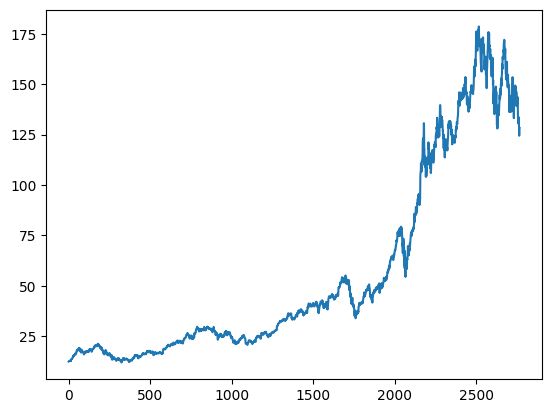

In [58]:
plt.plot(df.Close)

In [59]:
df

Price,Close,High,Low,Open
0,12.359181,12.397351,12.292161,12.304183
1,12.425601,12.462869,12.300576,12.322215
2,12.563548,12.579176,12.402457,12.470982
3,12.694887,12.705406,12.599315,12.615845
4,12.674752,12.855679,12.663331,12.788057
...,...,...,...,...
2763,130.173782,130.726619,127.982170,129.245801
2764,128.367188,129.729545,127.073942,129.699930
2765,124.428207,129.354393,124.260383,128.011784
2766,127.952568,128.811438,126.096612,126.353282


In [61]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2763    148.424344
2764    148.076097
2765    147.690727
2766    147.345332
2767    147.002602
Name: Close, Length: 2768, dtype: float64

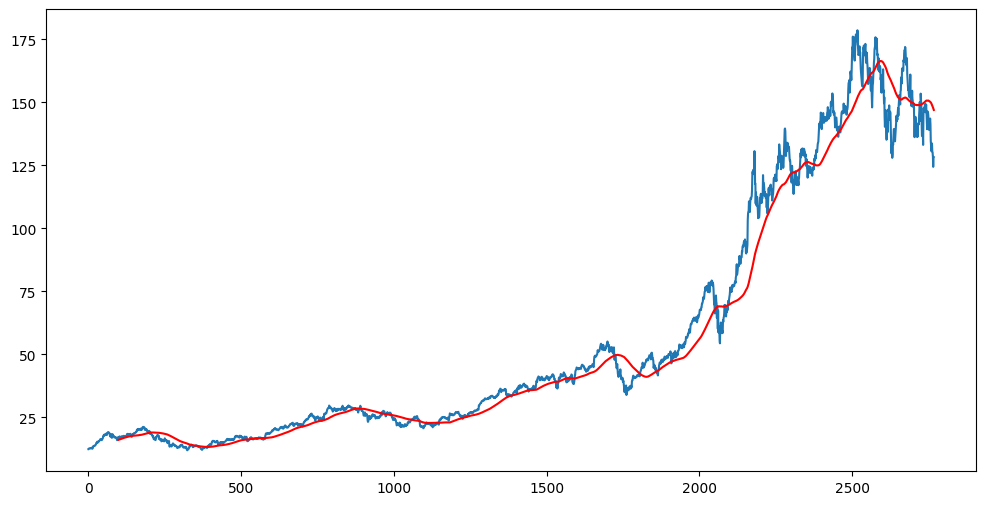

In [62]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [63]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2763    149.826820
2764    149.708339
2765    149.590359
2766    149.468035
2767    149.325179
Name: Close, Length: 2768, dtype: float64

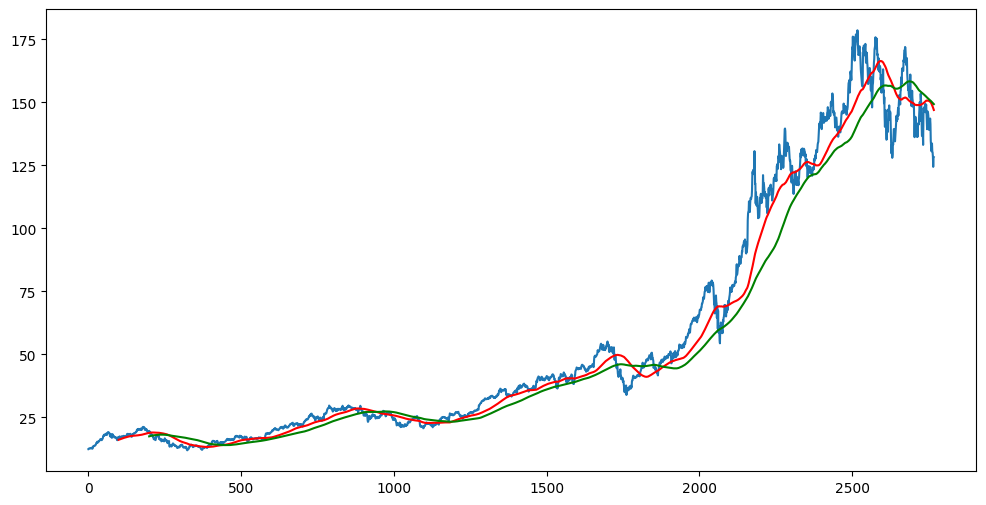

In [64]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [66]:
df.shape

(2768, 4)

# splitting Data into Training and Testing

In [69]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70) : int(len(df))])
print(data_training.shape,data_testing.shape)

(1937, 1) (831, 1)


In [70]:
data_training.head()

,Close
0,12.359181
1,12.425601
2,12.563548
3,12.694887
4,12.674752


In [71]:
data_testing.head()

,Close
1937,53.009884
1938,53.202740
1939,53.701748
1940,53.265415
1941,52.486771


In [74]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0,1))

In [75]:
data_training_array = scalar.fit_transform(data_training)
data_training_array

array([[0.01039581],
       [0.01193407],
       [0.01512888],
       ...,
       [0.97245458],
       [0.96966308],
       [0.94543324]])

In [79]:
x_train = [] #first 100 days will be this
y_train = [] #101 day will be this

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train

[array([[0.01039581],
        [0.01193407],
        [0.01512888],
        [0.01817065],
        [0.01770433],
        [0.01875536],
        [0.01827501],
        [0.01746765],
        [0.01636795],
        [0.01977155],
        [0.02284117],
        [0.02189455],
        [0.01670901],
        [0.02165791],
        [0.01678552],
        [0.03505674],
        [0.03364376],
        [0.03548842],
        [0.03947661],
        [0.04189187],
        [0.04169   ],
        [0.04094541],
        [0.04411921],
        [0.04710531],
        [0.05048801],
        [0.05595197],
        [0.06742991],
        [0.0676038 ],
        [0.07399351],
        [0.07876852],
        [0.07056197],
        [0.07372215],
        [0.07365942],
        [0.0825202 ],
        [0.08126017],
        [0.08359194],
        [0.08778203],
        [0.09011402],
        [0.09683092],
        [0.10172403],
        [0.10313706],
        [0.10363123],
        [0.09526462],
        [0.09324601],
        [0.09354545],
        [0

In [82]:
x_train = np.array(x_train)
x_train

array([[[0.01039581],
        [0.01193407],
        [0.01512888],
        ...,
        [0.11183744],
        [0.12129682],
        [0.11764945]],

       [[0.01193407],
        [0.01512888],
        [0.01817065],
        ...,
        [0.12129682],
        [0.11764945],
        [0.11554043]],

       [[0.01512888],
        [0.01817065],
        [0.01770433],
        ...,
        [0.11764945],
        [0.11554043],
        [0.12248699]],

       ...,

       [[0.85364529],
        [0.8573572 ],
        [0.87370187],
        ...,
        [0.91478251],
        [0.91986318],
        [0.93398813]],

       [[0.8573572 ],
        [0.87370187],
        [0.87192883],
        ...,
        [0.91986318],
        [0.93398813],
        [0.97245458]],

       [[0.87370187],
        [0.87192883],
        [0.8615127 ],
        ...,
        [0.93398813],
        [0.97245458],
        [0.96966308]]])

In [83]:
y_train = np.array(y_train)
y_train

array([0.11554043, 0.12248699, 0.12728963, ..., 0.97245458, 0.96966308,
       0.94543324])

In [88]:
x_train.shape

(1837, 100, 1)

# ML Model

In [85]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [90]:
model = Sequential()
model.add(LSTM(units = 50 , activation = 'relu' , return_sequences = True ,
               input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60 , activation = 'relu' , return_sequences = True ))
model.add(Dropout(0.3))

model.add(LSTM(units = 80 , activation = 'relu' , return_sequences = True ))
model.add(Dropout(0.4))

model.add(LSTM(units = 120 , activation = 'relu' ))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [91]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:
model.compile(optimizer='adam' , loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs = 50)

Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 37s 320ms/step - loss: 0.0712
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 324ms/step - loss: 0.0074
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 321ms/step - loss: 0.0076
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 325ms/step - loss: 0.0069
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 320ms/step - loss: 0.0072
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 324ms/step - loss: 0.0057
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 323ms/step - loss: 0.0077
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 324ms/step - loss: 0.0052
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 323ms/step - loss: 0.0051
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 20s 336ms/step - loss: 0.0052
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 18s 317ms/step - loss: 0.0052
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 18s 313ms/step - loss: 0.0041
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 18s 311ms/step - loss: 0.0043
Epoch 14/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 18s 314ms/step - loss: 0.0042
Epoch 15/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 22s 

In [94]:
model.save('keras_model.h5')

In [95]:
data_testing.head()

,Close
1937,53.009884
1938,53.202740
1939,53.701748
1940,53.265415
1941,52.486771


In [96]:
data_training.tail(100)

,Close
1837,49.558868
1838,49.109116
1839,48.874680
1840,48.948833
1841,48.006268
...,...
1932,51.628601
1933,52.238495
1934,53.899418
1935,53.778885


In [97]:
past_100_days = data_training.tail(100)

In [99]:
import pandas as pd

final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [101]:
final_df.head()

,Close
0,49.558868
1,49.109116
2,48.874680
3,48.948833
4,48.006268


In [106]:
input_data = scalar.fit_transform(final_df)

In [107]:
input_data

array([[0.05794947],
       [0.05466726],
       [0.05295639],
       [0.05349755],
       [0.04661888],
       [0.06381557],
       [0.06142371],
       [0.06596299],
       [0.06025397],
       [0.0504422 ],
       [0.05051216],
       [0.04670618],
       [0.0418516 ],
       [0.02176698],
       [0.02691955],
       [0.03088036],
       [0.02940824],
       [0.0275155 ],
       [0.01715772],
       [0.02330932],
       [0.01661441],
       [0.01114643],
       [0.00993705],
       [0.00864015],
       [0.00715051],
       [0.00876286],
       [0.00310206],
       [0.        ],
       [0.01111135],
       [0.01619388],
       [0.02089078],
       [0.02953101],
       [0.03378964],
       [0.03769792],
       [0.03661134],
       [0.03654119],
       [0.03407009],
       [0.03608552],
       [0.04407727],
       [0.04306084],
       [0.04584738],
       [0.04465568],
       [0.04430513],
       [0.0390299 ],
       [0.04644333],
       [0.04633813],
       [0.04314848],
       [0.049

In [108]:
input_data.shape

(931, 1)

In [109]:
x_test = []
y_test = []

In [110]:
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    

In [111]:
x_test , y_test = np.array(x_test) , np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(831, 100, 1)
(831,)


# making Prediction


In [113]:
y_predicted = model.predict(x_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 161ms/step


In [115]:
y_test

array([0.08313432, 0.08454174, 0.08818341, 0.08499914, 0.07931674,
       0.08105851, 0.07922888, 0.0851223 , 0.08311675, 0.08123439,
       0.09029444, 0.09138511, 0.08148074, 0.08475282, 0.09564254,
       0.09573052, 0.09105096, 0.09567771, 0.10106098, 0.11182752,
       0.1112294 , 0.1102618 , 0.10859046, 0.11019139, 0.11217934,
       0.11939222, 0.11842462, 0.12408934, 0.12479308, 0.13007076,
       0.13441605, 0.12428296, 0.12423018, 0.1339059 , 0.14632622,
       0.14928174, 0.14863069, 0.14882423, 0.15404729, 0.15530007,
       0.15893494, 0.15851151, 0.16294035, 0.15971134, 0.16521671,
       0.16758102, 0.16615182, 0.16068181, 0.15859968, 0.15819379,
       0.1662928 , 0.16262268, 0.16888683, 0.16784582, 0.1623934 ,
       0.15408256, 0.15812335, 0.16489918, 0.17395096, 0.16726354,
       0.17001614, 0.1740568 , 0.17527431, 0.1817855 , 0.1900962 ,
       0.191067  , 0.18988462, 0.1903786 , 0.18935535, 0.19740141,
       0.19787779, 0.20782977, 0.20763573, 0.21067067, 0.21442

In [114]:
y_predicted.shape

(831, 1)

In [117]:
scalar.scale_

array([0.00729781])

In [118]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

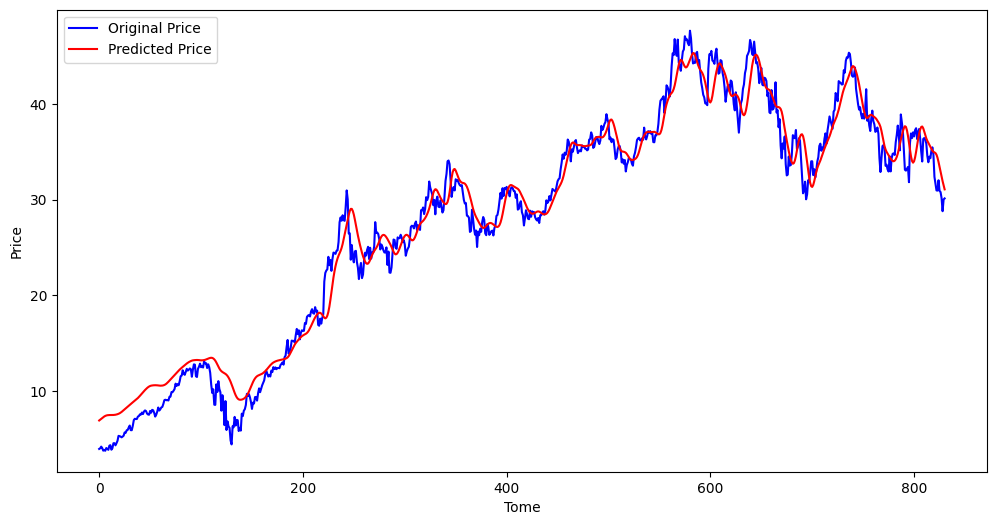

In [119]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label = 'Original Price')
plt.plot(y_predicted , 'r' , label = 'Predicted Price')
plt.xlabel('Tome')
plt.ylabel('Price')
plt.legend()